<strong><h3>Implementation of ANN for classification of animals based on the images of a animal</h3></strong>

In [2]:
# Loading datset in google collab
# datset with 2500+ photo of cats and dogs from https://www.kaggle.com/datasets/salader/dogs-vs-cats
!mkdir -p ~/.kaggle
!cp kaggle.json~./kaggle/
!kaggle datasets download -d salader/dogs-vs-cats

cp: missing destination file operand after 'kaggle.json~./kaggle/'
Try 'cp --help' for more information.
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:08<00:00, 19.2MB/s]
100% 1.06G/1.06G [00:08<00:00, 128MB/s] 


In [3]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip" , 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , BatchNormalization , Dropout

In [5]:
# Generator
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256 , 256)
)

validate_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256 , 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# nomalise the image values
def normalise(img , label):
  img = tf.cast(img/255.0 , tf.float32)
  return img , label

train_ds = train_ds.map(normalise)
validate_ds = validate_ds.map(normalise)

In [7]:
# Create CNN model

model = Sequential()
model.add(Conv2D(10 , kernel_size = (3 , 3) , padding="valid",activation = "relu",input_shape = (256 , 256 , 3) ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2) , strides = 2 , padding = 'valid'))

model.add(Conv2D(20 , kernel_size = (3 , 3) ,activation = "relu", padding="valid" ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2) , strides = 2 , padding = 'valid'))

model.add(Conv2D(40 , kernel_size = (3 , 3) ,activation = "relu", padding="valid"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2) , strides = 2 , padding = 'valid'))

model.add(Conv2D(80 , kernel_size = (3 , 3) ,activation = "relu", padding="valid" ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2) , strides = 2 , padding = 'valid'))

model.add(Flatten())

model.add(Dense(80, activation = "relu") )
model.add(Dropout(0.1))
model.add(Dense(40, activation = "relu") )
model.add(Dropout(0.1))
model.add(Dense(20, activation = "relu") )
model.add(Dropout(0.1))
model.add(Dense(1, activation = "sigmoid") )


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 10)      280       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 10)      40        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 10)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 20)      1820      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 20)      80        
 chNormalization)                                                
                                                        

In [49]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [50]:
history = model.fit(train_ds , epochs= 14 , validation_data = validate_ds )

Epoch 1/14
625/625 [==============================] - 51s 75ms/step - loss: 0.0604 - accuracy: 0.9795 - val_loss: 0.5752 - val_accuracy: 0.8592
Epoch 2/14
625/625 [==============================] - 45s 72ms/step - loss: 0.0442 - accuracy: 0.9859 - val_loss: 0.5805 - val_accuracy: 0.8514
Epoch 3/14
625/625 [==============================] - 50s 79ms/step - loss: 0.0411 - accuracy: 0.9858 - val_loss: 1.0786 - val_accuracy: 0.8074
Epoch 4/14
625/625 [==============================] - 49s 77ms/step - loss: 0.0335 - accuracy: 0.9888 - val_loss: 1.0941 - val_accuracy: 0.8270
Epoch 5/14
625/625 [==============================] - 46s 74ms/step - loss: 0.0340 - accuracy: 0.9885 - val_loss: 0.9706 - val_accuracy: 0.8062
Epoch 6/14
625/625 [==============================] - 50s 80ms/step - loss: 0.0297 - accuracy: 0.9898 - val_loss: 0.7166 - val_accuracy: 0.8586
Epoch 7/14
625/625 [==============================] - 49s 78ms/step - loss: 0.0357 - accuracy: 0.9890 - val_loss: 0.6076 - val_accuracy:

<strong>Reasult Visualization </strong>

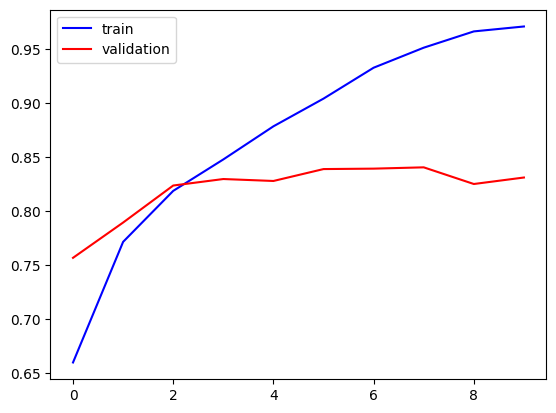

In [21]:
# Cheking for overfitting ( without BatchNormalization and dropout layer )
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'] , color = "blue" , label = "train")
plt.plot(history.history['val_accuracy'] , color = "red" , label = "validation")
plt.legend()
plt.show()

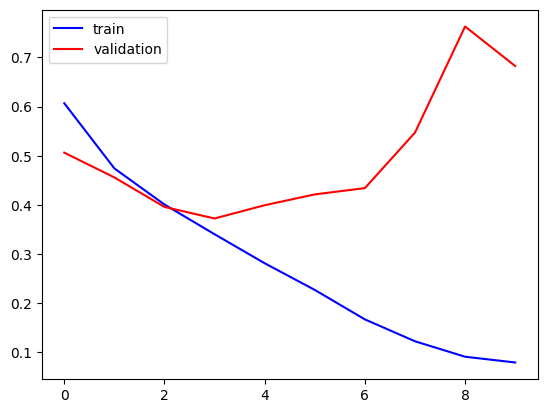

In [22]:
# Cheking for overfitting ( without BatchNormalization and dropout layer )
import matplotlib.pyplot as plt
plt.plot(history.history['loss'] , color = "blue" , label = "train")
plt.plot(history.history['val_loss'] , color = "red" , label = "validation")
plt.legend()
plt.show()

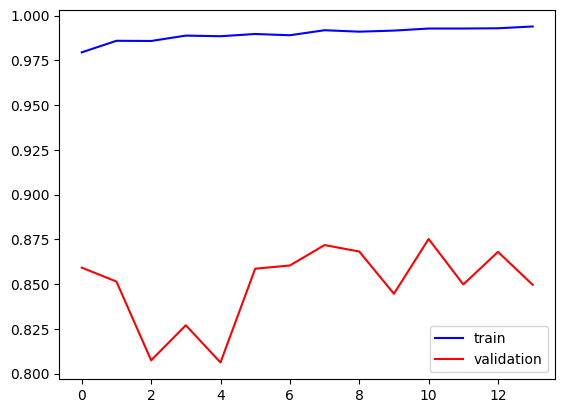

In [51]:
# Cheking for overfitting ( after BatchNormalization and dropout layer )
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'] , color = "blue" , label = "train")
plt.plot(history.history['val_accuracy'] , color = "red" , label = "validation")
plt.legend()
plt.show()

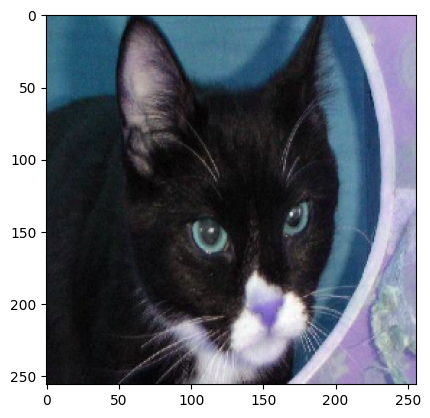

In [55]:
import cv2
test_cat = cv2.imread("/content/test/cats/cat.10001.jpg")
test_cat = cv2.resize(test_cat , (256 , 256 ))
plt.imshow(test_cat)

In [56]:
test_cat = test_cat.reshape((1 , 256 , 256 , 3))


In [57]:
model.predict(test_cat)

1/1 [==============================] - 0s 22ms/step


array([[0.]], dtype=float32)